In [ ]:
import pandas as pd
from google.colab import drive
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, HDBSCAN, DBSCAN, estimate_bandwidth, MeanShift, SpectralClustering, BisectingKMeans
from sklearn.decomposition import PCA
import seaborn as sns
#from tslearn.clustering import TimeSeriesKMeans
#from tslearn.datasets import CachedDatasets
#from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from scipy.spatial import ConvexHull
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.neighbors import NearestNeighbors

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)



In [ ]:
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/MyDrive/IE313/DoAn/Data/wdi_pca_3.csv")


Mounted at /content/drive


In [ ]:
df.head()

,Country,Country_code,PC1,PC2,PC3
0,Afghanistan,AFG,-4.440609,0.199704,-0.681927
1,Albania,ALB,1.384765,-1.001156,-0.291110
2,Algeria,DZA,1.394803,-1.304758,-0.833515
3,Andorra,AND,2.933966,1.703989,-0.540343
4,Angola,AGO,-3.776741,1.589128,1.606514


# Tìm số cụm phù hợp

In [ ]:

scores_pca = df[['PC1', 'PC2', 'PC3']].values
wcss = []
for i in range (1,10):
  kmeans_pca = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans_pca.fit(scores_pca)
  wcss.append(kmeans_pca.inertia_)



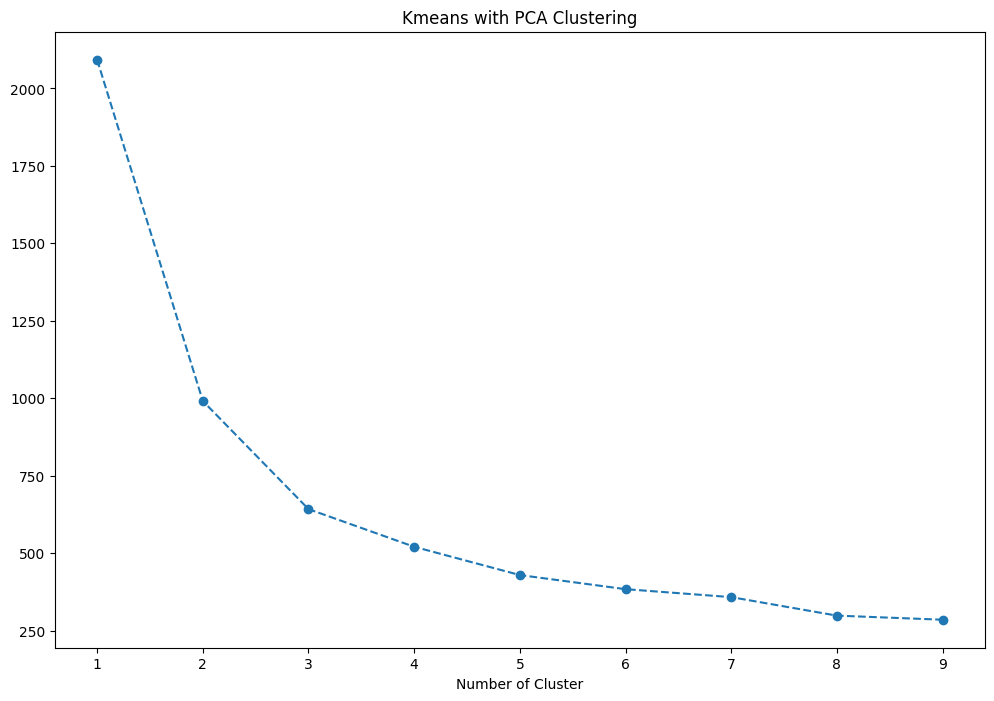

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(range(1,10), wcss, marker='o', linestyle='--')
plt.xlabel("Number of Cluster")
plt.title("Kmeans with PCA Clustering")
plt.show()

# Phân cụm Kmeans

In [ ]:
X = df[['PC1', 'PC2', 'PC3']].values

# Áp dụng KMeans với k=3 (từ kết quả elbow)
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(X)
centroids = kmeans.cluster_centers_
# Xem kết quả
df.head()


,Country,Country_code,PC1,PC2,PC3,Cluster
0,Afghanistan,AFG,-4.440609,0.199704,-0.681927,1
1,Albania,ALB,1.384765,-1.001156,-0.291110,0
2,Algeria,DZA,1.394803,-1.304758,-0.833515,0
3,Andorra,AND,2.933966,1.703989,-0.540343,2
4,Angola,AGO,-3.776741,1.589128,1.606514,1


In [ ]:
df.to_csv('/content/drive/MyDrive/IE313/DoAn/Data/Kmean_result.csv')

# Biểu đồ phân bố theo PC1 và PC2

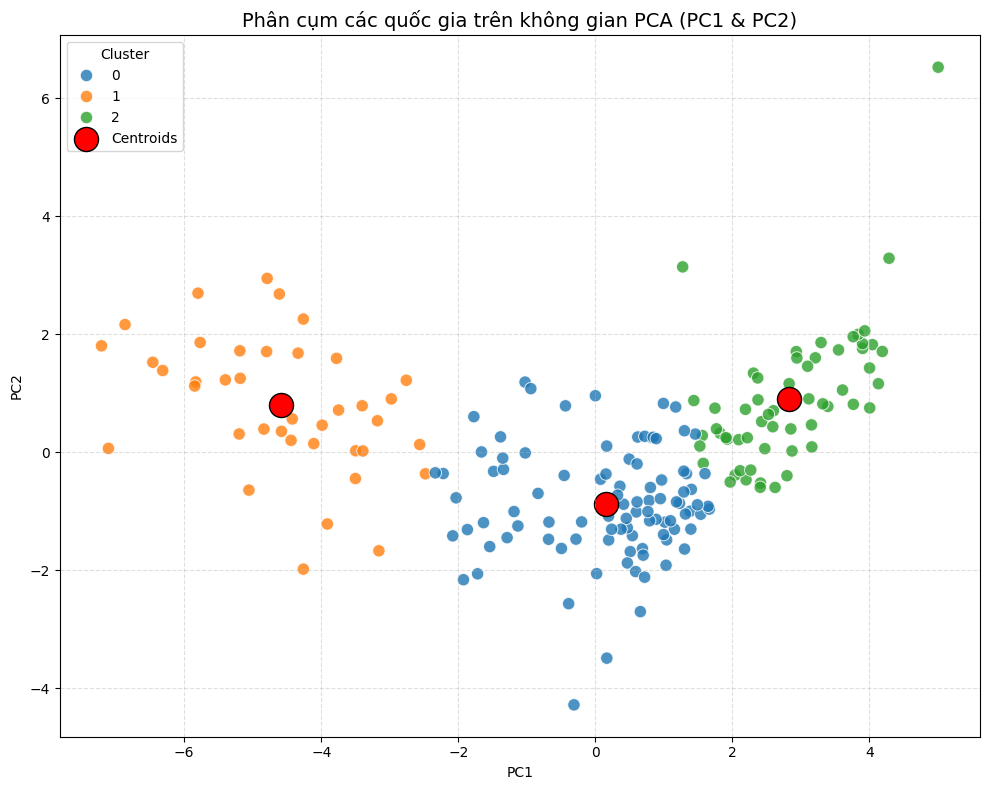

In [ ]:
plt.figure(figsize=(10,8 ))
sns.scatterplot(
    data=df,
    x="PC1", y="PC2",
    hue="Cluster",
    palette="tab10",
    s=80, alpha=0.8
)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
                s=300, c='red', label='Centroids', edgecolor='k')
# --- 5. Thiết lập biểu đồ ---
plt.title("Phân cụm các quốc gia trên không gian PCA (PC1 & PC2)", fontsize=14)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Cluster", loc="best")
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

# Đánh giá mô hình Kmeans





In [ ]:
X = df[["PC1","PC2","PC3"]].values

# Nhãn cụm từ KMeans
labels = df["Cluster"]

sil = silhouette_score(X, labels)
print("Silhouette Score:", sil)


Silhouette Score: 0.38810819048844075


In [ ]:
db_score  = davies_bouldin_score(X, labels)
ch_score  = calinski_harabasz_score(X, labels)

print("Davies-Bouldin score:", db_score)
print("Calinski-Harabasz score:", ch_score)

Davies-Bouldin score: 0.8863821247015533
Calinski-Harabasz score: 213.57864381745478


# Đánh giá các cụm dựa trên dữ liệu gốc

In [ ]:
df_cluster = pd.read_csv("/content/drive/MyDrive/IE313/DoAn/Data/Hierarchical/wdi_pca_3_complete_clusters.csv")
df_raw = pd.read_csv("/content/drive/MyDrive/IE313/DoAn/Data/clean_dataset.csv")
df_raw = df_raw.rename(columns={'REF_AREA_LABEL': 'Country'})

In [ ]:
df_cluster_sub = df_cluster[['Country', 'Cluster']]
df_merged = df_raw.merge(
    df_cluster_sub,
    on='Country',
    how='inner'
)
df_merged.shape
df_merged['Cluster'].value_counts()

,count
Cluster,
2,102
3,69
1,21


In [ ]:
df_merged.head(len(df_merged))

,Country,Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population),Prevalence of undernourishment (% of population),"Life expectancy at birth, total (years)","School enrollment, secondary (% gross)",Proportion of seats held by women in national parliaments (%),People using at least basic drinking water services (% of population),Access to electricity (% of population),GDP per capita (constant 2015 US$),Individuals using the Internet (% of population),Gini index,Urban population (% of total population),Combustible renewables and waste (% of total energy),Carbon dioxide (CO2) emissions (total) excluding LULUCF (Mt CO2e),Terrestrial and marine protected areas (% of total territorial area),Forest area (% of land area),Control of Corruption: Estimate,"Personal remittances, received (% of GDP)",Cluster
0,Afghanistan,74.850000,27.040,62.574400,57.039299,27.300370,76.651058,94.36,485.022544,17.020000,42.320000,26.0410,71.772536,7.685180,2.200,1.852782,-1.350299,3.452613,3
1,Albania,0.533333,4.340,78.428400,97.750899,31.660422,94.887747,100.00,4702.593151,73.620000,29.866667,62.0856,11.953787,4.893640,14.060,28.791971,-0.533840,9.451341,2
2,Algeria,1.368667,2.500,75.166200,105.932549,18.697789,94.401477,99.72,4550.913354,63.060000,31.155333,73.7168,0.019617,178.952920,5.480,0.818262,-0.651181,0.938388,2
3,Andorra,0.409667,9.772,82.821000,96.410336,43.571429,99.999998,100.00,37966.897123,93.075000,31.072667,87.9262,22.557427,314.155164,26.780,34.042553,1.234109,1.044342,1
4,Angola,39.300000,19.900,63.198600,52.543770,30.727273,57.161762,46.92,2528.206553,35.840000,51.300000,66.8114,49.617075,25.431760,5.000,53.426950,-0.890203,0.011172,3
5,Antigua and Barbuda,0.424000,11.292,77.228200,120.935959,11.111111,98.365005,100.00,17011.981288,75.060000,32.292000,24.4528,29.172229,0.304560,0.360,18.452000,0.251550,2.272852,2
6,Argentina,1.640000,3.380,75.849800,112.921304,41.883636,86.898913,100.00,12577.970303,83.740000,42.160000,92.1096,4.553315,185.477940,9.000,10.440634,-0.247956,0.149087,2
7,Armenia,2.160000,2.500,74.452195,94.250191,26.844763,99.941543,99.98,4291.837439,73.360000,29.060000,63.3370,3.568883,6.817460,24.140,11.537408,-0.112658,11.057159,2
8,Australia,0.500000,2.500,83.069756,137.291336,31.826049,99.969814,100.00,59174.925032,94.460000,34.300000,86.2454,3.724522,393.828380,30.840,17.421315,1.732053,0.096994,1
9,Austria,0.600000,2.500,81.453171,101.538490,38.907104,99.999999,100.00,45699.042195,89.780000,30.480000,58.7622,19.440367,65.143760,28.940,47.156762,1.413787,0.668681,1


In [ ]:
features = df_merged.drop(columns=['Cluster', 'Country']).columns.tolist()
min_max_by_cluster = (
    df_merged
    .groupby('Cluster')[features]
    .agg(['min', 'mean','max'])
)
#

In [ ]:
# Kiểm tra giá trị min, max, trung bình của các chỉ số của các nhóm
min_max_by_cluster = min_max_by_cluster.T
min_max_by_cluster.head(len(min_max_by_cluster))

Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)  \
                                                                        min   
Cluster                                                                       
1                                                    0.025                    
2                                                    0.000                    
3                                                    2.192                    

                           Prevalence of undernourishment (% of population)  \
              mean     max                                              min   
Cluster                                                                       
1         0.370746   1.736                                              2.5   
2         1.842196  10.240                                              2.5   
3        31.923686  85.300                                              3.6   

                           Life expectancy at birth, total (years)             \
              mean     max                                     min       mean   
Cluster                                                                         
1         3.896190  10.196                                 68.8290  81.557589   
2         5.624980  21.380                                 61.4838  75.119182   
3        19.211072  52.380                                 38.7040  64.201530   

                 School enrollment, secondary (% gross)              \
             max                                    min        mean   
Cluster                                                               
1        85.8366                              96.410336  117.382988   
2        84.4498                              61.175976   96.249956   
3        76.7378                               5.460224   57.508988   

                     \
                max   
Cluster               
1        150.190848   
2        135.150650   
3        101.391246   

        Proportion of seats held by women in national parliaments (%)  \
                                                                  min   
Cluster                                                                 
1                                                 8.750000              
2                                                 2.095759              
3                                                 0.132890              

                               \
              mean        max   
Cluster                         
1        35.467011  46.762178   
2        23.108444  53.299072   
3        20.979011  61.250000   

        People using at least basic drinking water services (% of population)  \
                                                                          min   
Cluster                                                                         
1                                                95.999869                      
2                                                82.127666                      
3                                                35.491009                      

                               Access to electricity (% of population)  \
              mean         max                                     min   
Cluster                                                                  
1        99.759596  100.000000                                  100.00   
2        96.552135  100.000000                                   69.02   
3        72.481608   97.920261                                    7.30   

                            GDP per capita (constant 2015 US$)                \
               mean     max                                min          mean   
Cluster                                                                        
1        100.000000  100.00                       13772.901846  61789.876495   
2         99.015686  100.00                        1163.001932  13396.487892   
3         60.502609   99.88        

In [ ]:
# Xuất ra tên các quốc gia trong nhóm
countries_by_cluster = (
    df_merged
    .groupby('Cluster')['Country']
    .apply(list)
)

for cluster, countries in countries_by_cluster.items():
    print(f"\nCluster {cluster} ({len(countries)} countries):")
    for c in countries:
        print(" -", c)


Cluster 1 (21 countries):
 - Andorra
 - Australia
 - Austria
 - Belgium
 - Denmark
 - Finland
 - France
 - Germany
 - Iceland
 - Ireland
 - Luxembourg
 - Monaco
 - Netherlands
 - New Zealand
 - Norway
 - Palau
 - Singapore
 - Sweden
 - Switzerland
 - United Kingdom
 - United States

Cluster 2 (102 countries):
 - Albania
 - Algeria
 - Antigua and Barbuda
 - Argentina
 - Armenia
 - Azerbaijan
 - Bahamas, The
 - Bahrain
 - Barbados
 - Belarus
 - Belize
 - Bhutan
 - Bosnia and Herzegovina
 - Brazil
 - Brunei Darussalam
 - Bulgaria
 - Cabo Verde
 - Canada
 - Chile
 - China
 - Colombia
 - Costa Rica
 - Croatia
 - Cuba
 - Cyprus
 - Czechia
 - Dominica
 - Dominican Republic
 - Ecuador
 - Egypt, Arab Rep.
 - El Salvador
 - Estonia
 - Fiji
 - Georgia
 - Greece
 - Grenada
 - Guyana
 - Hungary
 - Indonesia
 - Iran, Islamic Rep.
 - Iraq
 - Israel
 - Italy
 - Jamaica
 - Japan
 - Jordan
 - Kazakhstan
 - Korea, Rep.
 - Kuwait
 - Kyrgyz Republic
 - Latvia
 - Lebanon
 - Libya
 - Liechtenstein
 - Lithua

In [ ]:
# Xuất các thông tin của Việt Nam
print(df_merged.loc[df_merged['Country'] == 'Viet Nam'])


      Country  \
187  Viet Nam   

     Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)  \
187                                                1.7                     

     Prevalence of undernourishment (% of population)  \
187                                               5.7   

     Life expectancy at birth, total (years)  \
187                                  74.4682   

     School enrollment, secondary (% gross)  \
187                               94.179051   

     Proportion of seats held by women in national parliaments (%)  \
187                                          28.136597               

     People using at least basic drinking water services (% of population)  \
187                                          96.619838                       

     Access to electricity (% of population)  \
187                                    99.84   

     GDP per capita (constant 2015 US$)  \
187                         3313.681945   

     Individuals using 

In [ ]:
df_merged.to_csv("/content/drive/MyDrive/IE313/DoAn/Data/clean_data_with_cluster.csv")